In [149]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import requests
from collections import Counter
import matplotlib.pyplot as plt
plt.style.use('rossidata')
import seaborn as sns
import ruptures as rpt
import keras
from tensorflow.keras.layers import Conv2D, Activation, MaxPool2D, Flatten, Dense, Dropout,MaxPool1D,BatchNormalization
from tensorflow.keras.models import Sequential,load_model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Using TensorFlow backend.


In [33]:
key=open('../../keys/rescuetime.txt', "r").read().strip('\n')



get_str=f'https://www.rescuetime.com/anapi/data?key={key}&perspective=interval&restrict_kind=activity&interval=day&restrict_begin=2020-08-01&restrict_end=2020-11-01&format=json'


# payload={
#   "client_id": YOUR_CLIENT_ID,
#   "client_secret": YOUR_APP_SECRET,
#   "grant_type": "authorization_code",
#   "code": AUTH_CODE,
#   "redirect_uri": YOUR_REDIRECT_URI
# }

r = requests.get(get_str)


In [49]:
result_json=r.json()
df=pd.DataFrame(result_json['rows'],columns=result_json['row_headers'])
productive_activities=['localhost:8888','pycharm','Terminal','s3.console.aws.amazon.com','colab.research.google.com']
development=df[df.Activity.isin(productive_activities)]
summed=development.groupby('Date').sum().reset_index()
summed.Date=pd.to_datetime(summed.Date)
summed['Hours']=summed['Time Spent (seconds)']/3600

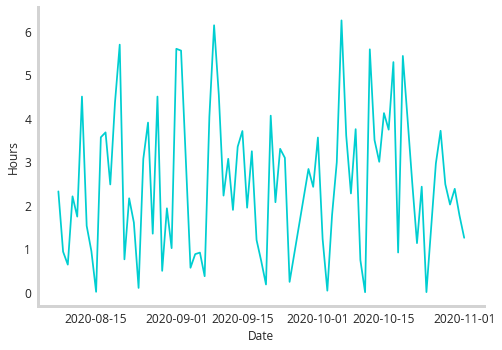

In [50]:
fig,ax=plt.subplots()
sns.lineplot(x='Date',y='Hours',data=summed)

In [ ]:
# overview

In [141]:
get_str=f'https://www.rescuetime.com/anapi/data?key={key}&perspective=interval&restrict_kind=productivity&interval=day&restrict_begin=2020-08-01&restrict_end=2020-11-01&format=json'


# payload={
#   "client_id": YOUR_CLIENT_ID,
#   "client_secret": YOUR_APP_SECRET,
#   "grant_type": "authorization_code",
#   "code": AUTH_CODE,
#   "redirect_uri": YOUR_REDIRECT_URI
# }

r = requests.get(get_str)

In [142]:
result_json=r.json()
df=pd.DataFrame(result_json['rows'],columns=result_json['row_headers'])
development=df[df.Productivity.isin([1,2])]
summed=development.groupby('Date').sum().reset_index()
summed.Date=pd.to_datetime(summed.Date)
summed['Hours']=summed['Time Spent (seconds)']/3600
summed=summed.set_index('Date')

In [148]:
summed[['Time Spent (seconds)','Hours']].rename(columns={'Time Spent (seconds)':'Seconds'}).to_csv('../data/rescuetime_data.csv')

In [ ]:
summed.to_csv('rescuetime_data')

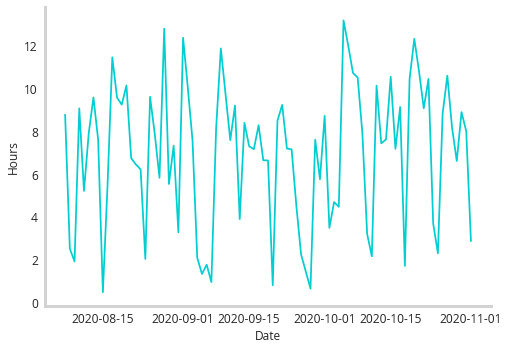

In [61]:
fig,ax=plt.subplots()
sns.lineplot(x='Date',y='Hours',data=summed)

Change detected at : 2020-10-02 00:00:00


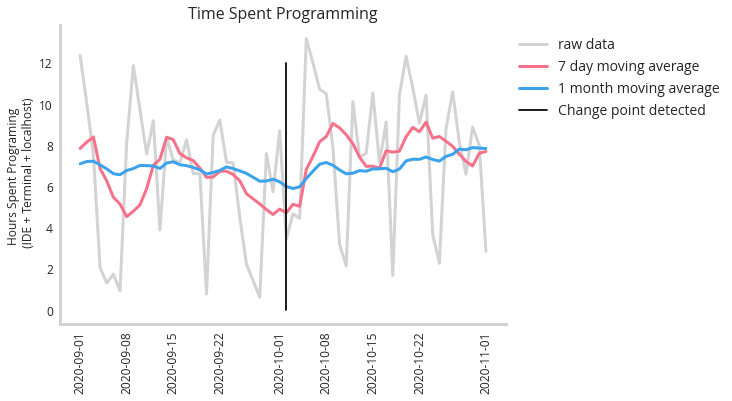

In [139]:
cutoff='2020-09-01'


rolled=summed.rolling('7d').mean()
rolled=rolled[cutoff:]
fig,ax=plt.subplots()
ax.plot(summed.Hours[cutoff:],color='#d3d3d3',label='raw data',linewidth=3)

colors=sns.color_palette("husl", 3)

ax.plot(rolled.Hours,color=colors[0],label='7 day moving average',linewidth=3)

rolled=summed.rolling('30d').mean()
rolled=rolled[cutoff:]



ax.plot(rolled.Hours,color=colors[2],label='1 month moving average',linewidth=3)
ax.set_title('Time Spent Programming')
ax.set_ylabel('Hours Spent Programing \n (IDE + Terminal + localhost)')


algo = rpt.Pelt(model="l2",min_size=14).fit(summed.Hours[cutoff:].values)
result = algo.predict(pen=10)
for r in result:
    if r!=len(summed[cutoff:]):
        point=rolled.reset_index().iloc[r].Date
        ax.plot([point,point],[0,12],color='black',label='Change point detected')
        print(f'Change detected at : {point}')
plt.xticks(rotation='vertical')
ax.legend(bbox_to_anchor=(1, 1))

#fig.savefig('figs/rolling_averages_original_batch.png',dpi=300,bbox_inches='tight')

In [86]:
result

[78]